In [1]:
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from dateutil.relativedelta import relativedelta
from pmdarima import auto_arima
from pandas import DataFrame
from pandas import merge
import datetime as dt
import pandas as pd

In [2]:
df = read_csv('http://itpaper.co.kr/demo/covid19/all_csv.php', encoding='euc-kr')
df['날짜'] = to_datetime(df['날짜'], format='%Y-%m-%d')
df

,지역명,날짜,확진자,치료중,격리해제,사망자
0,서울,2020-02-17,14,11,3,0
1,서울,2020-02-18,0,11,0,0
2,서울,2020-02-19,1,10,2,0
3,서울,2020-02-20,7,17,0,0
4,서울,2020-02-21,5,21,1,0
...,...,...,...,...,...,...
8512,제주,2021-06-27,2,51,5,0
8513,제주,2021-06-28,2,43,10,0
8514,제주,2021-06-29,6,44,5,0
8515,제주,2021-06-30,2,40,6,0


In [3]:
now = dt.datetime.now()
if now.hour >= 11:
    before = now - relativedelta(years=1)
else:
    now = dt.datetime.now() - dt.timedelta(days = 1)
    before = now - relativedelta(years=1)

now = now.strftime("%Y-%m-%d")
before = before.strftime("%Y-%m-%d")


print(before)
print(now)

2020-07-01
2021-07-01


In [4]:
df = df.query('지역명 == "서울" and 날짜 >= @before and 날짜 <= @now')
df

,지역명,날짜,확진자,치료중,격리해제,사망자
135,서울,2020-07-01,9,288,41,0
136,서울,2020-07-02,13,273,28,0
137,서울,2020-07-03,12,254,31,0
138,서울,2020-07-04,7,242,18,1
139,서울,2020-07-05,16,256,2,0
...,...,...,...,...,...,...
496,서울,2021-06-27,242,2712,111,0
497,서울,2021-06-28,185,2808,88,1
498,서울,2021-06-29,205,2948,65,0
499,서울,2021-06-30,375,2973,350,0


In [5]:
df = df.reset_index().drop('index', axis = 1)
df

,지역명,날짜,확진자,치료중,격리해제,사망자
0,서울,2020-07-01,9,288,41,0
1,서울,2020-07-02,13,273,28,0
2,서울,2020-07-03,12,254,31,0
3,서울,2020-07-04,7,242,18,1
4,서울,2020-07-05,16,256,2,0
...,...,...,...,...,...,...
361,서울,2021-06-27,242,2712,111,0
362,서울,2021-06-28,185,2808,88,1
363,서울,2021-06-29,205,2948,65,0
364,서울,2021-06-30,375,2973,350,0


In [6]:
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 지원 폰트 설정
plt.rcParams["font.size"] = 14                # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (20, 10)     # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False  

In [7]:
xticks_index = np.linspace(0,360,25)
xticks_index

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
       330., 345., 360.])

In [8]:
xticks_label = []
for i in xticks_index:
    xticks_label.append(str(df.loc[i,'날짜'])[:10].replace('-','/'))
xticks_label

['2020/07/01',
 '2020/07/16',
 '2020/07/31',
 '2020/08/15',
 '2020/08/30',
 '2020/09/14',
 '2020/09/29',
 '2020/10/14',
 '2020/10/29',
 '2020/11/13',
 '2020/11/28',
 '2020/12/13',
 '2020/12/28',
 '2021/01/12',
 '2021/01/27',
 '2021/02/11',
 '2021/02/26',
 '2021/03/13',
 '2021/03/28',
 '2021/04/12',
 '2021/04/27',
 '2021/05/12',
 '2021/05/27',
 '2021/06/11',
 '2021/06/26']

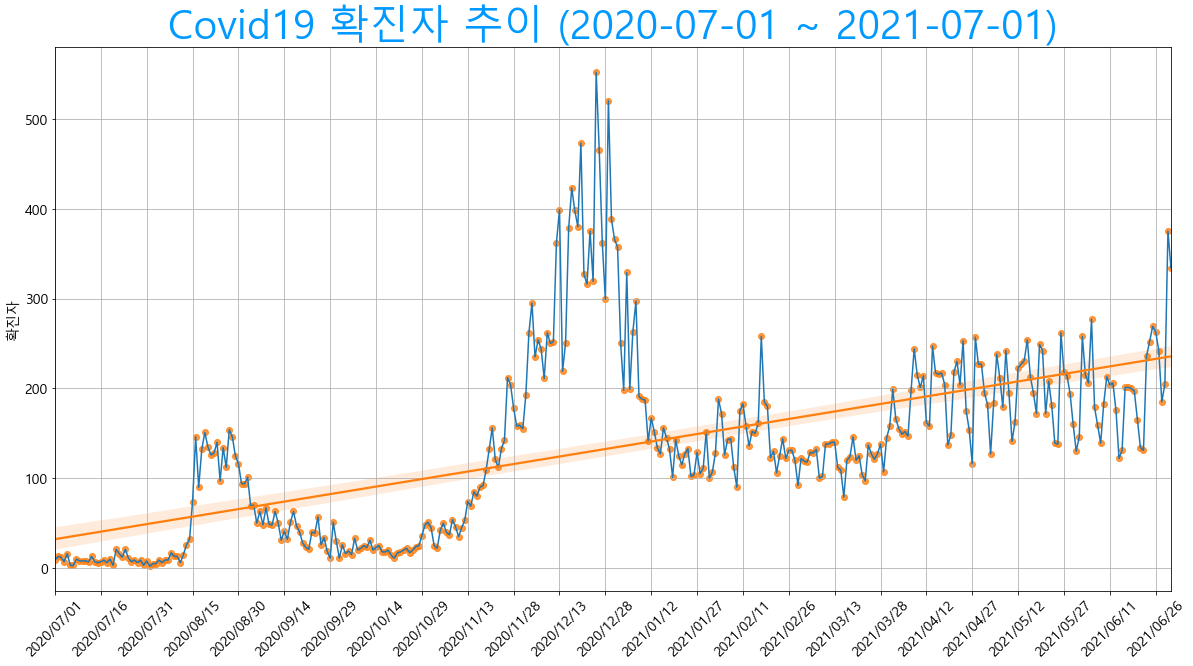

In [9]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(x=df.index, y='확진자', data=df, ax=ax)
sns.regplot(x=df.index, y='확진자', data=df, ax=ax)
ax.grid()
ax.set_title('Covid19 확진자 추이 (%s ~ %s)' %(before, now), fontsize = 40, color = '#0099ff')
ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label, rotation = 45)
plt.show()
plt.close()

In [10]:
aa_model = auto_arima(df['확진자'], start_p=0,start_q=0,max_p=3,max_q=3,trace=True,suppress_warnings=True,stepwise=False,seasonal=False)
aa_model.fit(df['확진자'])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3771.183, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3718.745, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3701.526, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3701.455, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3750.780, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3707.975, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3702.427, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3674.391, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3716.136, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3699.954, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3672.447, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3694.374, Time=0.52 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3712.311, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3701.927, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3701.813, Time=0.46 sec

Best mode

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [11]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(df['확진자'], order=aa_model.order)

# 이 객체를 통해 시계열 분석의 예측데이터를 얻을 수 있다.
fit = model.fit()

print(fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.확진자   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1830.224
Method:                       css-mle   S.D. of innovations             36.362
Date:                Thu, 01 Jul 2021   AIC                           3672.448
Time:                        11:11:33   BIC                           3695.847
Sample:                             1   HQIC                          3681.747
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8642      1.064      0.812      0.417      -1.222       2.951
ar.L1.D.확진자     1.2093      0.062     19.379      0.000       1.087       1.332
ar.L2.D.확진자    -0.4707      0.059     -7.933    

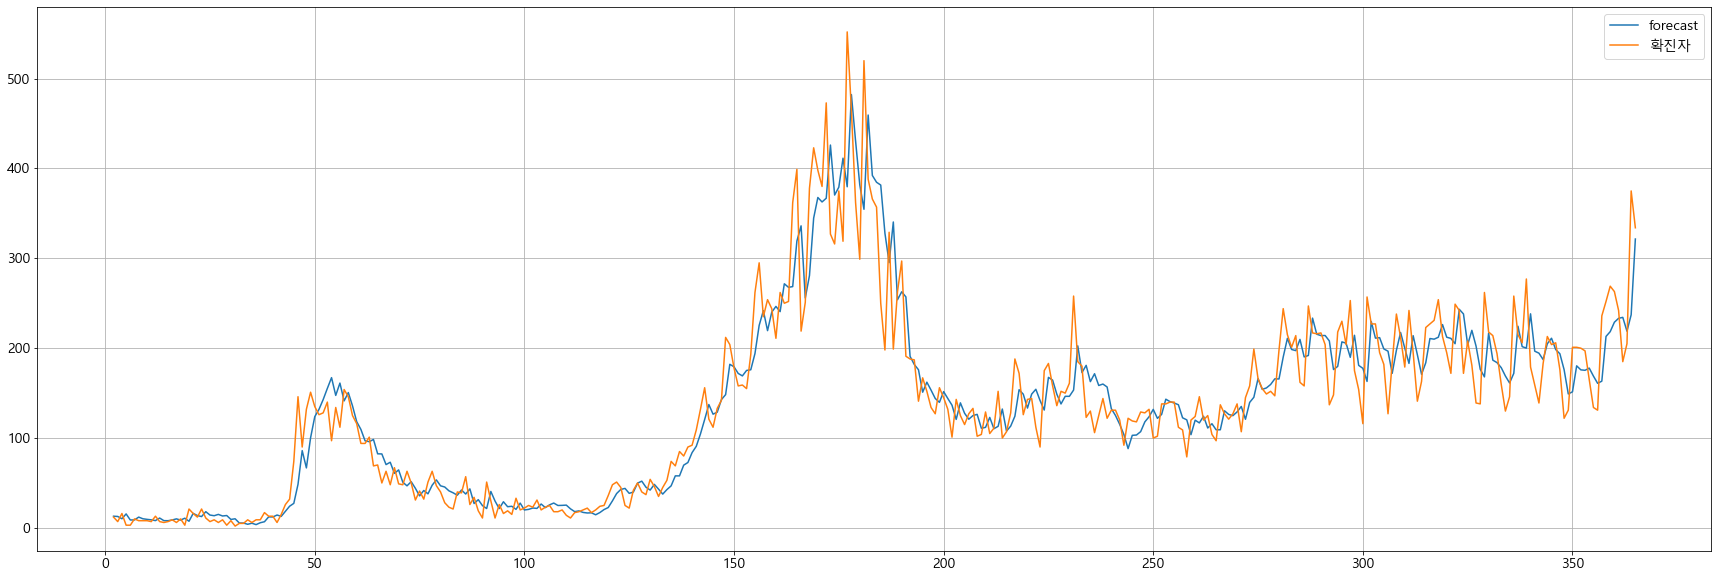

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

fit.plot_predict(ax=ax)
ax.grid()

In [13]:
fc, se, conf = fit.forecast(15, alpha=0.05) # 유의수준 5%
print(fc)
print(conf)

[303.23974402 296.47724975 303.00359738 314.30460707 325.12473615
 333.11601891 337.91278463 340.17797234 340.88537174 340.90053281
 340.81180327 340.92326265 341.32570481 341.98580102 342.82051298]
[[231.97250038 374.50698765]
 [217.31451413 375.63998537]
 [221.68916398 384.31803078]
 [231.29292016 397.31629397]
 [239.27291986 410.97655243]
 [242.47521164 423.75682618]
 [240.64086238 435.18470688]
 [235.20929073 445.14665395]
 [227.99380184 453.77694163]
 [220.40693728 461.39412835]
 [213.26333689 468.36026965]
 [206.88231432 474.96421098]
 [201.27184351 481.3795661 ]
 [196.29161215 487.67998989]
 [191.76415142 493.87687453]]


In [14]:
s = df.index.max()+1
e = s + 15
idx = list(range(s, e))
idx

[366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380]

In [15]:
future_label = []
now_date = df.loc[df.index.max()]['날짜']
for i in range(0,len(idx)):
    now_date = now_date + dt.timedelta(days = 1)
    future_label.append(str(now_date)[:10].replace('-','/'))
future_label


['2021/07/02',
 '2021/07/03',
 '2021/07/04',
 '2021/07/05',
 '2021/07/06',
 '2021/07/07',
 '2021/07/08',
 '2021/07/09',
 '2021/07/10',
 '2021/07/11',
 '2021/07/12',
 '2021/07/13',
 '2021/07/14',
 '2021/07/15',
 '2021/07/16']

In [16]:
fc_df = DataFrame(index=idx)
fc_df['날짜'] = future_label
fc_df['예측'] = fc
fc_df

,날짜,예측
366,2021/07/02,303.239744
367,2021/07/03,296.477250
368,2021/07/04,303.003597
369,2021/07/05,314.304607
370,2021/07/06,325.124736
371,2021/07/07,333.116019
372,2021/07/08,337.912785
373,2021/07/09,340.177972
374,2021/07/10,340.885372
375,2021/07/11,340.900533


In [17]:
conf_df = DataFrame(conf, index=idx).rename(columns={0:'최소', 1:'최대'})
conf_df

,최소,최대
366,231.972500,374.506988
367,217.314514,375.639985
368,221.689164,384.318031
369,231.292920,397.316294
370,239.272920,410.976552
371,242.475212,423.756826
372,240.640862,435.184707
373,235.209291,445.146654
374,227.993802,453.776942
375,220.406937,461.394128


In [18]:
예측df = merge(fc_df, conf_df, left_index=True, right_index=True)
예측df

,날짜,예측,최소,최대
366,2021/07/02,303.239744,231.972500,374.506988
367,2021/07/03,296.477250,217.314514,375.639985
368,2021/07/04,303.003597,221.689164,384.318031
369,2021/07/05,314.304607,231.292920,397.316294
370,2021/07/06,325.124736,239.272920,410.976552
371,2021/07/07,333.116019,242.475212,423.756826
372,2021/07/08,337.912785,240.640862,435.184707
373,2021/07/09,340.177972,235.209291,445.146654
374,2021/07/10,340.885372,227.993802,453.776942
375,2021/07/11,340.900533,220.406937,461.394128


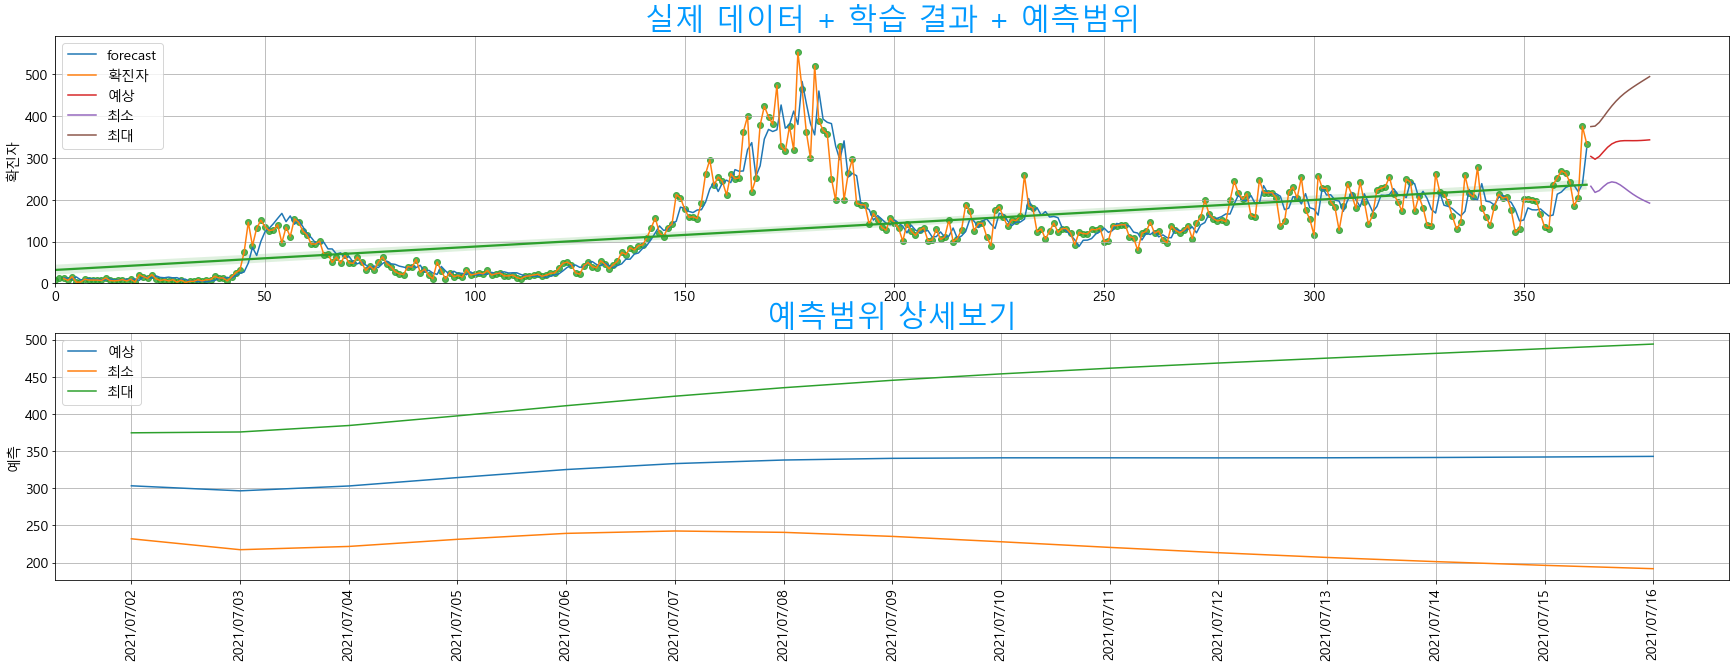

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(30, 10))

fit.plot_predict(ax=ax[0])
sns.regplot(x=df.index, y='확진자', data=df, ax=ax[0])
sns.lineplot(x=fc_df.index, y='예측', label='예상', data=예측df, ax=ax[0])
sns.lineplot(x=fc_df.index, y='최소', label='최소', data=예측df, ax=ax[0])
sns.lineplot(x=fc_df.index, y='최대', label='최대', data=예측df, ax=ax[0])

sns.lineplot(x=fc_df.index, y='예측', label='예상', data=예측df, ax=ax[1])
sns.lineplot(x=fc_df.index, y='최소', label='최소', data=예측df, ax=ax[1])
sns.lineplot(x=fc_df.index, y='최대', label='최대', data=예측df, ax=ax[1])

ax[0].grid()
ax[0].set_title('실제 데이터 + 학습 결과 + 예측범위', fontsize = 30, color = '#0099ff')
ax[0].set_ylim(0,590)

ax[1].grid()
ax[1].set_title('예측범위 상세보기', fontsize = 30, color = '#0099ff')
ax[1].set_xticks(idx)
ax[1].set_xticklabels(future_label, rotation = 90)
plt.show()

### 보건복지부 사회적 거리두기 개편안을 보면, 사회적 거리 두기 1단계 시행 기준은<br>전국 500명 미만, 수도권 250명 미만일때 실시하지만, 향후 15일간 예측값은 모두 250명 이상임을 볼 수 있다. <br>예측값으로 미루어 보아 향후 15일간은 사회적 거리두기 1단계가 시행되지 않는다.